In [1]:
pip install hdbscan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
X = dataset.iloc[:, 3:5].values

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
import hdbscan
X = np.random.rand(100, 2)
num_clusters_list = []
min_cluster_size_range = np.arange(2, 15)
for min_cluster_size in min_cluster_size_range:
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    hdbscan_clusterer.fit(X)
    num_clusters = len(set(hdbscan_clusterer.labels_)) - (1 if -1 in hdbscan_clusterer.labels_ else 0)
    num_clusters_list.append(num_clusters)

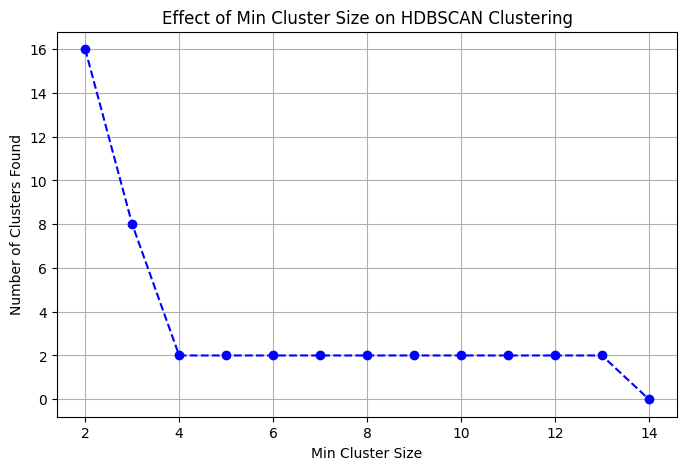

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(min_cluster_size_range, num_clusters_list, marker='o', linestyle='--', color='b')
plt.title('Effect of Min Cluster Size on HDBSCAN Clustering')
plt.xlabel('Min Cluster Size')
plt.ylabel('Number of Clusters Found')
plt.grid(True)
plt.show()

In [9]:
num_clusters_list

[16, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0]

In [10]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=42)
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)  # Adjust parameters as needed
y_hdbscan = hdbscan_clusterer.fit_predict(X)

In [11]:
y_hdbscan

array([1, 3, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0,
       2, 3, 2, 3, 3, 0, 3, 1, 0, 0, 2, 2, 3, 1, 2, 1, 2, 3, 0, 3, 0, 0,
       2, 1, 1, 0, 1, 3, 2, 3, 2, 1, 3, 3, 0, 0, 3, 1, 2, 1, 0, 2, 2, 0,
       1, 3, 2, 3, 3, 2, 3, 0, 1, 0, 1, 3, 0, 3, 3, 1, 0, 2, 2, 2, 2, 3,
       1, 2, 0, 3, 1, 1, 1, 2, 3, 1, 0, 3, 2, 2, 3, 0, 3, 1, 2, 0, 0, 2,
       1, 0, 3, 2, 3, 2, 2, 3, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 3, 0, 0,
       3, 2, 2, 1, 0, 0, 3, 0, 1, 3, 2, 1, 1, 3, 1, 2, 0, 0, 3, 2, 1, 2,
       0, 2, 2, 1, 1, 1, 3, 1, 1, 2, 3, 0, 1, 1, 0, 1, 2, 3, 0, 0, 1, 0,
       1, 3, 3, 0, 3, 0, 2, 2, 2, 3, 1, 1, 1, 3, 3, 0, 2, 2, 3, 2, 1, 3,
       0, 1], dtype=int64)

In [12]:
supervised=dataset

In [13]:
supervised['Cluster_group']=y_hdbscan

In [14]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [15]:
supervised.to_csv("cluster_HDBSCAN_Clustering.csv", index=False)

In [16]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [17]:
dir(hdbscan)

['BranchDetector',
 'HDBSCAN',
 'RobustSingleLinkage',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_hdbscan_boruvka',
 '_hdbscan_linkage',
 '_hdbscan_reachability',
 '_hdbscan_tree',
 '_prediction_utils',
 'all_points_membership_vectors',
 'approximate_predict',
 'approximate_predict_branch',
 'approximate_predict_scores',
 'branches',
 'detect_branches_in_clusters',
 'dist_metrics',
 'hdbscan',
 'hdbscan_',
 'membership_vector',
 'plots',
 'prediction',
 'robust_single_linkage',
 'robust_single_linkage_',
 'validity',
 'validity_index']

In [18]:
cluster_centers = []
for label in np.unique(y_hdbscan):
    if label != -1:  # Exclude noise points (label = -1)
        cluster_points = X[y_hdbscan == label]  
        cluster_center = np.mean(cluster_points, axis=0)  
        cluster_centers.append(cluster_center)

cluster_centers = np.array(cluster_centers)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[-6.80424841 -6.88571308]
 [ 4.60639759  2.07515451]
 [-8.7850371   7.37403591]
 [-2.62455845  8.94744168]]


In [19]:
y_hdbscan

array([1, 3, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0,
       2, 3, 2, 3, 3, 0, 3, 1, 0, 0, 2, 2, 3, 1, 2, 1, 2, 3, 0, 3, 0, 0,
       2, 1, 1, 0, 1, 3, 2, 3, 2, 1, 3, 3, 0, 0, 3, 1, 2, 1, 0, 2, 2, 0,
       1, 3, 2, 3, 3, 2, 3, 0, 1, 0, 1, 3, 0, 3, 3, 1, 0, 2, 2, 2, 2, 3,
       1, 2, 0, 3, 1, 1, 1, 2, 3, 1, 0, 3, 2, 2, 3, 0, 3, 1, 2, 0, 0, 2,
       1, 0, 3, 2, 3, 2, 2, 3, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 3, 0, 0,
       3, 2, 2, 1, 0, 0, 3, 0, 1, 3, 2, 1, 1, 3, 1, 2, 0, 0, 3, 2, 1, 2,
       0, 2, 2, 1, 1, 1, 3, 1, 1, 2, 3, 0, 1, 1, 0, 1, 2, 3, 0, 0, 1, 0,
       1, 3, 3, 0, 3, 0, 2, 2, 2, 3, 1, 1, 1, 3, 3, 0, 2, 2, 3, 2, 1, 3,
       0, 1], dtype=int64)

In [20]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

In [21]:
import seaborn as sns
np.random.seed(42)
supervised = pd.DataFrame({
    'CustomerID': np.arange(1, 101),
    'Age': np.random.randint(18, 70, 100),
    'Annual Income (k$)': np.random.randint(15, 140, 100),
    'Spending Score (1-100)': np.random.randint(1, 100, 100),
})
x_col = 'Annual Income (k$)'
y_col = 'Spending Score (1-100)'
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)  
supervised['Cluster'] = hdbscan_clusterer.fit_predict(supervised[[x_col, y_col]])

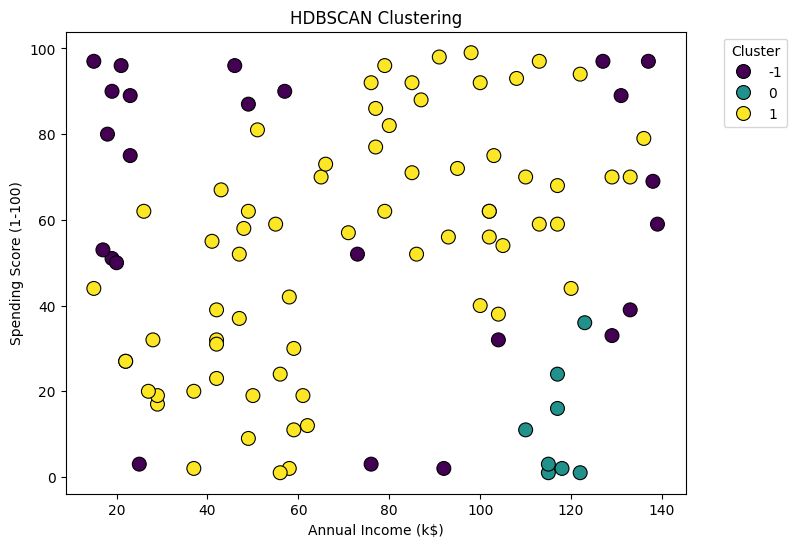

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=supervised, x=x_col, y=y_col, hue='Cluster', palette="viridis", s=100, edgecolor='k')
plt.title('HDBSCAN Clustering')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(title='Cluster', loc='best', bbox_to_anchor=(1.05, 1))
plt.show()